#  1) Importation dataset & analyses rapides

In [1]:
import pandas as pd
import zipfile
from datetime import datetime
import time

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00498/incident_event_log.zip")
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [3]:
df.shape

(141712, 36)

In [4]:
df.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

# 2) Preparation données -> analyse attributs/columnes à garder ou valeur à supprimer/changer

* POUR PREDIRE LE TEMPS RESTANT AVANT COMPLETION (cad TEMPS POUR RESOUDRE LE PROBLEME), ON A D'ABORD BESOIN D'UNE COLUMNE NOMMEE 'duration' qui correspond A LA DUREE ENTRE L'OUVERTURE DU TICKET ET SA RESOLUTION (resolved_at - opened_at) QUE L'ON CONVERTIS EN JOURS

* ON S'ASSURE QUE TOUTES LES VALEURS DE TEMPS CORRESPONDENT A DES DATETIME, SINON ON DROP CES VALEURS

In [5]:
df['resolved_at'].value_counts()

?                  3141
3/6/2016 16:29       93
3/6/2016 16:28       85
3/6/2016 16:27       83
3/6/2016 16:31       59
12/5/2016 23:51      58
29/4/2016 09:37      57
4/8/2016 08:39       56
13/5/2016 14:55      56
15/3/2016 12:11      54
3/5/2016 17:09       49
3/6/2016 16:30       47
11/5/2016 15:37      46
24/3/2016 11:37      46
3/6/2016 16:26       46
5/4/2016 14:28       45
13/4/2016 16:41      45
6/4/2016 15:29       45
19/5/2016 10:43      45
23/3/2016 14:44      45
6/4/2016 09:24       43
6/5/2016 14:39       43
7/4/2016 11:05       42
7/4/2016 14:23       42
31/3/2016 11:13      41
17/3/2016 10:33      40
18/4/2016 12:51      40
25/5/2016 10:14      40
10/5/2016 16:26      40
6/4/2016 12:22       39
                   ... 
9/3/2016 18:56        2
6/4/2016 15:33        2
16/3/2016 09:31       2
10/3/2016 10:01       2
17/3/2016 18:11       2
8/4/2016 06:47        2
15/4/2016 18:45       2
19/4/2016 17:20       2
17/3/2016 17:04       2
30/3/2016 20:15       2
22/3/2016 09:55 

* ON DROP LES ? DES DATES (3000 lignes drop, mais de toute facon inutilisable)

In [6]:
indexNames = df[ df['resolved_at'] == '?' ].index
df.drop(indexNames , inplace=True)
df['resolved_at'].value_counts()

3/6/2016 16:29     93
3/6/2016 16:28     85
3/6/2016 16:27     83
3/6/2016 16:31     59
12/5/2016 23:51    58
29/4/2016 09:37    57
13/5/2016 14:55    56
4/8/2016 08:39     56
15/3/2016 12:11    54
3/5/2016 17:09     49
3/6/2016 16:30     47
11/5/2016 15:37    46
3/6/2016 16:26     46
24/3/2016 11:37    46
19/5/2016 10:43    45
5/4/2016 14:28     45
23/3/2016 14:44    45
13/4/2016 16:41    45
6/4/2016 15:29     45
6/5/2016 14:39     43
6/4/2016 09:24     43
7/4/2016 14:23     42
7/4/2016 11:05     42
31/3/2016 11:13    41
17/3/2016 10:33    40
25/5/2016 10:14    40
18/4/2016 12:51    40
10/5/2016 16:26    40
6/4/2016 12:22     39
1/4/2016 15:59     39
                   ..
9/3/2016 18:56      2
6/4/2016 15:33      2
16/3/2016 09:31     2
10/3/2016 10:01     2
17/3/2016 18:11     2
8/4/2016 06:47      2
15/4/2016 18:45     2
19/4/2016 17:20     2
17/3/2016 17:04     2
30/3/2016 20:15     2
22/3/2016 09:55     2
6/4/2016 09:01      2
25/4/2016 13:58     2
28/3/2016 16:38     2
21/3/2016 

In [7]:
df['opened_at'].value_counts()

14/4/2016 20:42    58
4/7/2016 14:38     56
7/3/2016 09:11     52
7/3/2016 11:58     52
9/3/2016 16:03     51
7/3/2016 11:04     51
30/3/2016 09:20    49
7/3/2016 09:25     48
4/3/2016 10:28     48
6/4/2016 15:09     48
15/3/2016 14:42    47
30/3/2016 08:20    46
11/3/2016 11:25    46
8/3/2016 10:40     46
15/3/2016 09:38    46
19/4/2016 08:20    45
24/3/2016 16:01    44
4/5/2016 09:47     43
7/3/2016 11:50     42
7/3/2016 10:35     42
2/3/2016 16:10     41
5/5/2016 09:38     40
9/3/2016 09:57     40
11/3/2016 14:18    40
4/3/2016 10:30     40
4/5/2016 09:24     39
30/5/2016 08:58    39
30/5/2016 10:34    39
8/3/2016 13:43     39
9/3/2016 10:25     39
                   ..
18/3/2016 22:38     2
18/3/2016 14:41     2
10/3/2016 09:55     2
2/3/2016 17:40      2
17/3/2016 20:40     2
17/3/2016 15:31     2
19/3/2016 08:37     2
14/3/2016 10:18     2
8/4/2016 06:41      2
31/3/2016 01:02     2
17/3/2016 10:48     2
30/4/2016 01:59     2
15/4/2016 15:03     2
1/4/2016 08:41      2
15/3/2016 

* ON PASSE LES DATES EN FORMAT DATETIME, PUIS ON CREE LA COLUMNE 'duration' (correspondant à notre target)

In [8]:
df['opened_at'] = pd.to_datetime(df["opened_at"])
df['resolved_at'] = pd.to_datetime(df["resolved_at"])
df['duration'] = df['resolved_at']-df['opened_at']
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,duration
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0 days 10:13:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0 days 10:13:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0 days 10:13:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0 days 10:13:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-01-03 09:52:00,6/3/2016 10:00,-57 days +05:12:00


* ON CONVERTIT EN JOUR (float)

In [9]:
df['duration']= df['duration'].dt.total_seconds() / 86400
df['duration']= df['duration'].round(1)
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,duration
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0.4
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0.4
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0.4
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,5/3/2016 12:00,0.4
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-01-03 09:52:00,6/3/2016 10:00,-56.8


# L'ATTRIBUT 'duration' EST DONC NOTRE CIBLE (target)

* ON REMARQUE QU'IL Y A DES DUREE NEGATIVE, CAD QUE DES MAUVAISES DATES ONT ETE RENTREES ( cad opened_at > resolved_at ). ON SUPPRIME ALORS CES LIGNES, QUI CORRESPONDENT A ENVIRON 3500 LIGNES, MAIS INUTILISABLES

In [10]:
indexneg = df[ df['duration'] < 0 ].index
df.drop(indexneg , inplace=True)
df.shape

(112572, 37)

* ON CHECK LES AUTRES COLUMNES 

In [11]:
df['incident_state'].value_counts()

Active                30372
New                   29631
Resolved              20835
Closed                20303
Awaiting User Info    10502
Awaiting Vendor         535
Awaiting Problem        355
Awaiting Evidence        36
-100                      3
Name: incident_state, dtype: int64

* ON DROP LES 3 VALEURS '-100'

In [12]:
indexState = df[ df['incident_state'] == '-100' ].index
df.drop(indexState , inplace=True)
df['incident_state'].value_counts()

Active                30372
New                   29631
Resolved              20835
Closed                20303
Awaiting User Info    10502
Awaiting Vendor         535
Awaiting Problem        355
Awaiting Evidence        36
Name: incident_state, dtype: int64

In [13]:
df['active'].value_counts()

True     92265
False    20304
Name: active, dtype: int64

In [14]:
df['reassignment_count'].value_counts()

0     57896
1     29598
2     11352
3      5922
4      3246
5      1740
6       986
7       662
8       388
9       251
10      192
11      121
12       79
13       33
14       33
20       15
15       13
18       12
17       10
16        8
19        6
22        4
21        2
Name: reassignment_count, dtype: int64

In [15]:
df['sys_mod_count'].value_counts()

0      20248
1      18031
2      17491
3      12025
4       8748
5       6675
6       5303
7       4233
8       3352
9       2624
10      2080
11      1670
12      1389
13      1103
14       910
15       757
16       619
17       539
18       458
19       403
20       321
21       302
22       265
23       224
24       201
25       172
27       153
26       148
28       134
30       114
       ...  
94         6
93         6
88         6
86         6
83         6
90         6
89         5
92         4
101        3
100        3
99         3
97         3
96         3
95         3
116        2
115        2
114        2
113        2
85         2
102        2
98         2
112        1
106        1
105        1
103        1
129        1
84         1
117        1
128        1
119        1
Name: sys_mod_count, Length: 115, dtype: int64

In [16]:
df['made_sla'].value_counts()

True     105946
False      6623
Name: made_sla, dtype: int64

In [17]:
df['caller_id'].value_counts()

Caller 1904    1409
Caller 290      648
Caller 4514     626
Caller 1441     267
Caller 298      238
Caller 93       215
Caller 90       213
Caller 1531     207
Caller 3763     202
Caller 4414     184
Caller 707      175
Caller 156      174
Caller 5317     171
Caller 3870     170
Caller 3160     169
Caller 4893     168
Caller 4808     166
Caller 1517     165
Caller 116      163
Caller 2522     163
Caller 363      162
Caller 1325     160
Caller 2471     158
Caller 944      158
Caller 3479     155
Caller 5093     154
Caller 994      154
Caller 1353     154
Caller 1129     151
Caller 501      149
               ... 
Caller 1189       3
Caller 2930       3
Caller 3553       3
Caller 2129       3
Caller 4385       3
Caller 4891       3
Caller 4130       3
Caller 5449       3
Caller 1091       3
Caller 1180       3
Caller 3441       3
Caller 1343       3
Caller 2673       3
Caller 587        3
Caller 5065       3
Caller 326        3
Caller 1815       3
Caller 665        3
Caller 664        2


In [18]:
df['opened_by'].value_counts()

Opened by  17     33873
Opened by  24      6823
Opened by  131     5896
Opened by  55      4629
Opened by  108     4583
?                  3722
Opened by  62      3592
Opened by  40      3531
Opened by  8       3449
Opened by  501     3280
Opened by  397     3158
Opened by  386     3033
Opened by  390     2548
Opened by  180     2490
Opened by  305     2482
Opened by  301     2472
Opened by  58      1990
Opened by  221     1822
Opened by  59      1696
Opened by  239     1659
Opened by  500     1299
Opened by  94       965
Opened by  463      874
Opened by  47       791
Opened by  443      752
Opened by  444      564
Opened by  240      498
Opened by  402      475
Opened by  460      473
Opened by  468      427
                  ...  
Opened by  488        7
Opened by  88         7
Opened by  75         6
Opened by  419        6
Opened by  318        6
Opened by  101        6
Opened by  406        6
Opened by  159        6
Opened by  429        6
Opened by  5          6
Opened by  119  

In [19]:
df['notify'].value_counts()

Do Not Notify    112493
Send Email           76
Name: notify, dtype: int64

MALGRE QUE CERTAINES COLUMNES CONTIENNENT BEAUCOUP DE ? , ON NE PEUT PAS DROP LES ROWS ?, CAR TROP NOMBREUSES. ON DECIDE DE NE PAS DROP LA COLUMNES ENTIERE CAR LES INFORMATIONS RESTANTES CORRECTES PEUVENT NEANMOINS S'AVERRER TRES IMPORTANTE, NOTAMMENT SUR LA CATEGORIE 'probleme_id', ON GARDE DONC TEL QUEL

In [20]:
df['problem_id'].value_counts()

?                  110932
Problem ID  52         82
Problem ID  14         76
Problem ID  239        48
Problem ID  2          47
Problem ID  95         40
Problem ID  32         33
Problem ID  7          29
Problem ID  190        26
Problem ID  110        21
Problem ID  17         20
Problem ID  141        17
Problem ID  10         16
Problem ID  144        16
Problem ID  21         16
Problem ID  137        16
Problem ID  228        15
Problem ID  135        15
Problem ID  165        15
Problem ID  199        14
Problem ID  68         14
Problem ID  125        14
Problem ID  119        14
Problem ID  91         14
Problem ID  20         13
Problem ID  217        13
Problem ID  111        13
Problem ID  45         13
Problem ID  41         12
Problem ID  167        12
                    ...  
Problem ID  62          2
Problem ID  229         2
Problem ID  117         2
Problem ID  164         2
Problem ID  161         2
Problem ID  153         2
Problem ID  155         2
Problem ID  

In [21]:
df['rfc'].value_counts()

?             111822
CHG0000132        20
CHG0000047        18
CHG0001656        17
CHG0001398        15
CHG0003516        15
CHG0003167        13
CHG0000932        12
CHG0000342        12
CHG0000959        12
CHG0000097        11
CHG0001530        11
CHG0001126        10
CHG0000910        10
CHG0000089         9
CHG0003447         9
CHG0001863         9
CHG0001073         9
CHG0000585         9
CHG0001006         9
CHG0001043         8
CHG0001442         8
CHG0002096         8
CHG0001222         8
CHG0000293         8
CHG0001920         8
CHG0001301         8
CHG0001210         8
CHG0001002         8
CHG0001943         8
               ...  
CHG0000708         3
CHG0001462         3
CHG0000872         3
CHG0000752         3
CHG0001653         3
CHG0001767         3
CHG0000819         3
CHG0000886         3
CHG0000879         3
CHG0000870         3
CHG0000887         3
CHG0000914         3
CHG0000576         3
CHG0001685         3
CHG0001444         3
CHG0000868         3
CHG0000771   

In [22]:
df['vendor'].value_counts()

?           112397
code 8s        113
Vendor 1        53
Vendor 3         4
Vendor 2         2
Name: vendor, dtype: int64

In [23]:
df['resolved_by'].value_counts()

Resolved by 15     11771
Resolved by 11     10062
Resolved by 103     4275
Resolved by 177     3427
Resolved by 53      2793
Resolved by 62      2662
Resolved by 166     2120
Resolved by 180     1975
Resolved by 22      1897
Resolved by 133     1888
Resolved by 227     1879
Resolved by 66      1871
Resolved by 32      1705
Resolved by 196     1676
Resolved by 71      1664
Resolved by 215     1649
Resolved by 85      1528
Resolved by 126     1485
Resolved by 30      1467
Resolved by 114     1399
Resolved by 113     1270
Resolved by 134     1250
Resolved by 212     1187
Resolved by 33      1176
Resolved by 27      1171
Resolved by 208     1137
Resolved by 231     1084
Resolved by 153     1079
Resolved by 183     1011
Resolved by 169      973
                   ...  
Resolved by 136       11
Resolved by 210       11
Resolved by 145       11
Resolved by 56        11
Resolved by 229       11
Resolved by 105       10
Resolved by 149       10
Resolved by 156       10
Resolved by 55         9


In [24]:
df['caused_by'].value_counts()

?             112546
CHG0000097        11
CHG0000132         7
CHG0001327         5
Name: caused_by, dtype: int64

* ON DROP LES COLONNES QUI A LA FOIS ONT TROP DE ? ET QUI SEMBLENT PEU IMPORTANTE, EN PRENANT EN COMPTE LES CONSEQUENCE SI ON DOIT LES GARDER AVEC TOUS CES ?

In [25]:
df = df.drop(columns=['vendor', 'caused_by','rfc','sys_created_at','cmdb_ci','assigned_to'])

In [27]:
df = df.drop(columns=['opened_at', 'resolved_at','closed_at'])
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,duration
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,Created by 6,...,True,False,Do Not Notify,?,0,0,0,code 5,Resolved by 149,0.4
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,Created by 6,...,True,False,Do Not Notify,?,0,0,0,code 5,Resolved by 149,0.4
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,Created by 6,...,True,False,Do Not Notify,?,0,0,0,code 5,Resolved by 149,0.4
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,Created by 6,...,True,False,Do Not Notify,?,0,0,0,code 5,Resolved by 149,0.4
24,INC0000062,New,True,0,0,0,True,Caller 3765,Opened by 180,Created by 81,...,True,False,Do Not Notify,?,0,0,0,code 7,Resolved by 62,0.4


* VOICI LES ATTRIBUTS QUI ONT ETE GARDES

In [28]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'sys_created_by', 'sys_updated_by', 'sys_updated_at', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact',
       'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'duration'],
      dtype='object')

* ON RECUPERE L'HEURE D'UPDATE (ENTRE 0 ET 24) POUR CET ATTRIBUT. CELA N'A PAS ETE FAIT POUR D'AUTRES ATTRIBUTS COMME sys_created_at CAR IL Y AVAIT BEAUCOUP TROP DE ? , DONC IL A ETE DROP PRECEDEMMENT

In [29]:
def hr_func(ts):
    return ts.hour

In [30]:
df['sys_updated_at'] = pd.to_datetime(df["sys_updated_at"])
df['sys_updated_at'] = df['sys_updated_at'].apply(hr_func)

In [31]:
df['sys_updated_at'].value_counts()

10    12180
11    11955
9     11763
15    10599
14    10214
16     9958
8      8211
12     7168
17     6994
13     6627
18     4760
19     2438
7      1356
21     1087
22      985
20      980
1       934
0       790
2       733
23      722
6       691
3       507
4       498
5       419
Name: sys_updated_at, dtype: int64

#  3) CONVERSION DES DONNES STRING CATEGORICAL EN INT CATEGORICAL 

* POUR APPLIQUER LA REGRESSION ET CORRELATION SUR LES ATTRIBUTS, CEUX-CI DOIVENT ETRE MIS SOUS FORME D'ENTIER. ON TRANSFORME DONC LES STRING CATEGORICAL EN INT EN S'ASSURANT BIEN QUE LEUR ASTYPE EST CATEGORY

In [32]:
df['incident_state'] = df['incident_state'].astype('category')
df['incident_state'] = df['incident_state'].cat.codes

In [33]:
df['active'] = df['active'].astype('category')
df['active'] = df['active'].cat.codes

In [34]:
df['number'] = df['number'].astype('category')
df['number'] = df['number'].cat.codes

In [35]:
df['made_sla'] = df['made_sla'].astype('category')
df['made_sla'] = df['made_sla'].cat.codes

In [36]:
df['caller_id'] = df['caller_id'].astype('category')
df['caller_id'] = df['caller_id'].cat.codes

In [37]:
df['opened_by'] = df['opened_by'].astype('category')
df['opened_by'] = df['opened_by'].cat.codes

In [38]:
df['sys_created_by'] = df['sys_created_by'].astype('category')
df['sys_created_by'] = df['sys_created_by'].cat.codes

In [39]:
df['sys_updated_by'] = df['sys_updated_by'].astype('category')
df['sys_updated_by'] = df['sys_updated_by'].cat.codes

In [40]:
df['sys_updated_at'] = df['sys_updated_at'].astype('category')
df['sys_updated_at'] = df['sys_updated_at'].cat.codes

In [41]:
df['contact_type'] = df['contact_type'].astype('category')
df['contact_type'] = df['contact_type'].cat.codes

In [42]:
df['location'] = df['location'].astype('category')
df['location'] = df['location'].cat.codes

In [43]:
df['category'] = df['category'].astype('category')
df['category'] = df['category'].cat.codes

In [44]:
df['subcategory'] = df['subcategory'].astype('category')
df['subcategory'] = df['subcategory'].cat.codes

In [45]:
df['u_symptom'] = df['u_symptom'].astype('category')
df['u_symptom'] = df['u_symptom'].cat.codes

In [46]:
df['impact'] = df['impact'].astype('category')
df['impact'] = df['impact'].cat.codes

In [47]:
df['urgency'] = df['urgency'].astype('category')
df['urgency'] = df['urgency'].cat.codes

In [48]:
df['priority'] = df['priority'].astype('category')
df['priority'] = df['priority'].cat.codes

In [49]:
df['assignment_group'] = df['assignment_group'].astype('category')
df['assignment_group'] = df['assignment_group'].cat.codes

In [50]:
df['knowledge'] = df['knowledge'].astype('category')
df['knowledge'] = df['knowledge'].cat.codes

In [51]:
df['u_priority_confirmation'] = df['u_priority_confirmation'].astype('category')
df['u_priority_confirmation'] = df['u_priority_confirmation'].cat.codes

In [52]:
df['notify'] = df['notify'].astype('category')
df['notify'] = df['notify'].cat.codes

In [53]:
df['problem_id'] = df['problem_id'].astype('category')
df['problem_id'] = df['problem_id'].cat.codes

In [54]:
df['closed_code'] = df['closed_code'].astype('category')
df['closed_code'] = df['closed_code'].cat.codes

In [55]:
df['resolved_by'] = df['resolved_by'].astype('category')
df['resolved_by'] = df['resolved_by'].cat.codes

In [56]:
df['notify'] = df['notify'].astype('category')
df['notify'] = df['notify'].cat.codes

In [57]:
df['duration'] = df['duration'].astype('float')

In [58]:
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,duration
0,0,6,1,0,0,0,1,1357,191,146,...,1,0,0,0,0,0,0,13,52,0.4
1,0,7,1,0,0,2,1,1357,191,146,...,1,0,0,0,0,0,0,13,52,0.4
2,0,7,1,0,0,3,1,1357,191,146,...,1,0,0,0,0,0,0,13,52,0.4
3,0,5,0,0,0,4,1,1357,191,146,...,1,0,0,0,0,0,0,13,52,0.4
24,1,6,1,0,0,0,1,2684,33,164,...,1,0,0,0,0,0,0,15,178,0.4


In [59]:
df.shape

(112569, 33)

In [60]:
df.duration.describe()

count    112569.000000
mean         34.859300
std          61.366134
min           0.000000
25%           0.100000
50%           4.000000
75%          35.900000
max         534.900000
Name: duration, dtype: float64

#  4) LIEN ENTRE VARIABLES (Columnes) ET CIBLE ('duration')

In [61]:
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt

* ON AFFICHE LA MATRICE DE CORRELATION ( PANDAS)

In [62]:
print(df.corr())

                           number  incident_state    active  \
number                   1.000000        0.085860 -0.046256   
incident_state           0.085860        1.000000 -0.159160   
active                  -0.046256       -0.159160  1.000000   
reassignment_count      -0.095056       -0.140245  0.038430   
reopen_count             0.000129       -0.070102  0.018159   
sys_mod_count           -0.077272       -0.056180 -0.099284   
made_sla                 0.100628       -0.083118  0.528564   
caller_id               -0.005355       -0.003584  0.004747   
opened_by               -0.094164       -0.008139  0.001610   
sys_created_by          -0.205700       -0.021666  0.028963   
sys_updated_by           0.040583        0.061552 -0.490821   
sys_updated_at          -0.033289        0.027309 -0.116227   
contact_type             0.122813       -0.001237  0.006944   
location                -0.034138        0.021642 -0.000974   
category                 0.007231       -0.017054  0.00

* FINALEMENT, ON TRIE LES DEPENDANCES DES ATTRIBUTS AVEC "duration" (duration étant le target)

In [63]:
df.corr()["duration"].sort_values(ascending = False)

duration                   1.000000
sys_mod_count              0.331568
knowledge                  0.241656
reassignment_count         0.210312
active                     0.086325
rfc                        0.073983
sys_created_by             0.065128
resolved_by                0.059288
contact_type               0.047187
reopen_count               0.044035
sys_updated_at             0.038171
subcategory                0.027554
vendor                     0.024417
location                   0.024276
impact                     0.022949
category                   0.017133
priority                   0.013562
urgency                    0.010760
caller_id                  0.010305
problem_id                 0.009781
cmdb_ci                    0.009674
opened_by                  0.008309
assigned_to                0.006086
caused_by                 -0.002073
notify                    -0.012144
closed_code               -0.041100
sys_updated_by            -0.068352
assignment_group          -0

* REPRESENTATION GRAPHIQUES EN UTILISANT PANDAS

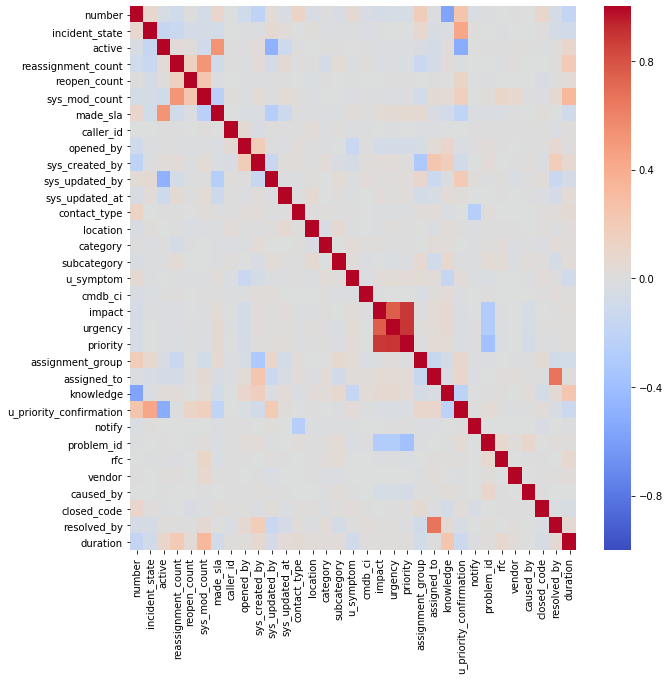

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm');

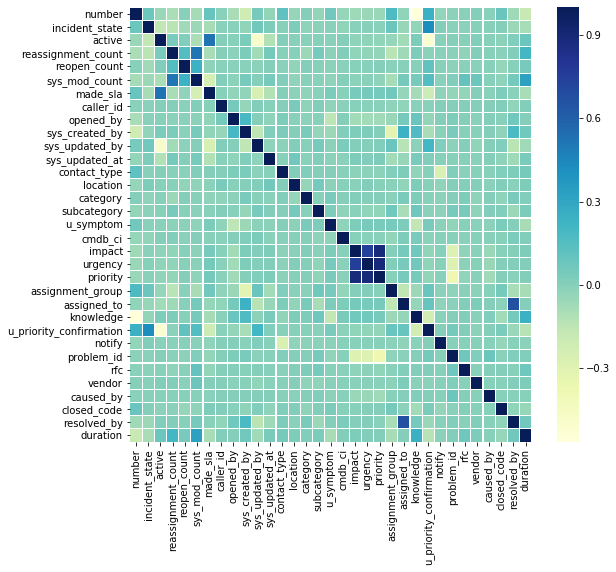

In [65]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(df.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

* EN UTILISANT SEABORN, ET EN TRIANT PAR CORRELATION DECROISSANTE 

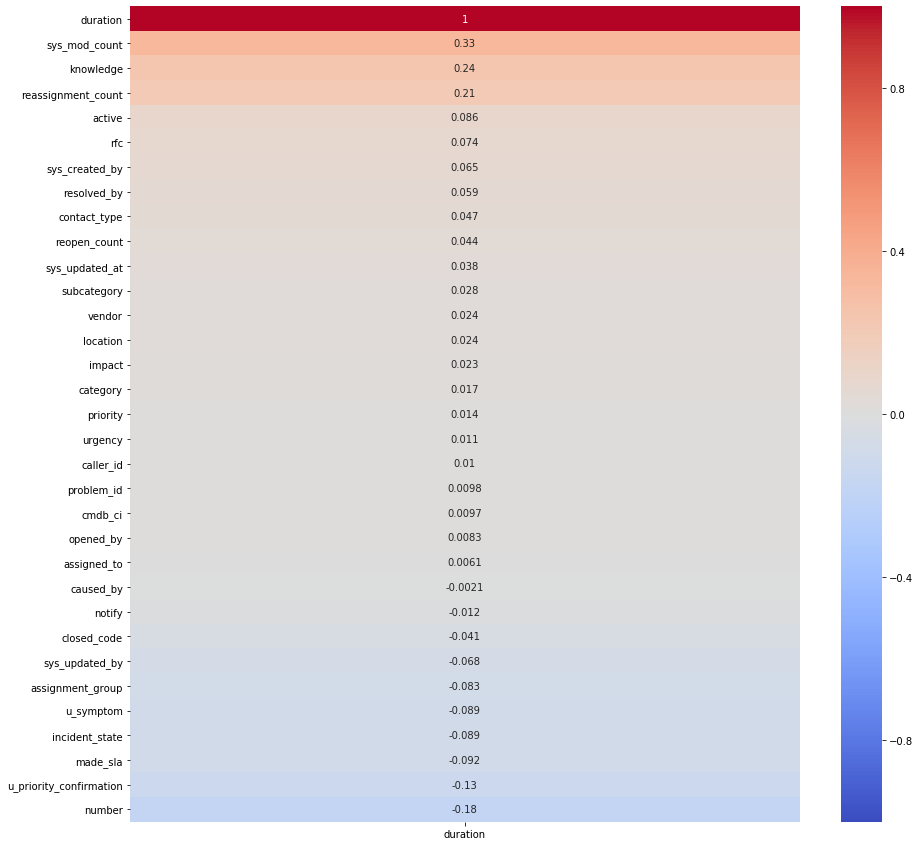

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()[['duration']].sort_values(by=['duration'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

* QUELQUES GRAPHES CONCERNANT NOTRE TARGET 'duration'

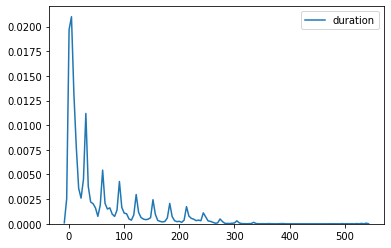

In [67]:
sns.kdeplot(df['duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2046d618630>,
 'caps': [<matplotlib.lines.Line2D at 0x204741361d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2046d618588>],
 'medians': [<matplotlib.lines.Line2D at 0x204741369e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20474136860>],
 'means': []}

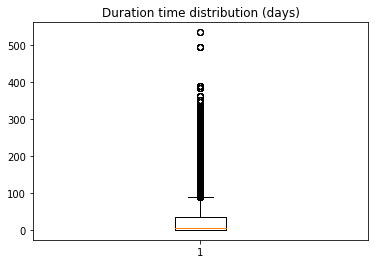

In [68]:
fig1, ax1 = plt.subplots()
ax1.set_title('Duration time distribution (days)')
ax1.boxplot(df['duration'])

In [69]:
from scipy import stats

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['duration'] >= Q1 - 1.5 * IQR) & (df['duration'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

{'whiskers': [<matplotlib.lines.Line2D at 0x2046d4be240>,
 'caps': [<matplotlib.lines.Line2D at 0x2046d4be8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2046d4bf470>],
 'medians': [<matplotlib.lines.Line2D at 0x20473b2d748>],
 'fliers': [<matplotlib.lines.Line2D at 0x20473afabe0>],
 'means': []}

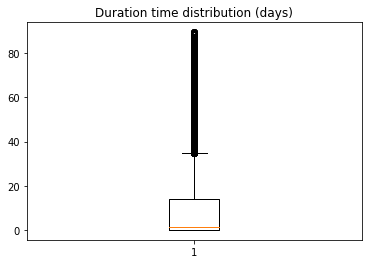

In [70]:
fig1, ax1 = plt.subplots()
ax1.set_title('Duration time distribution (days)')
ax1.boxplot(df['duration'])

In [71]:
df.shape

(95167, 33)

* ON A REMOVE LES OUTLIERS

# 5) REGRESSION AVEC SCIKITLEARN, LASSO, RIDGE...

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
y = df['duration'].values
X = df.drop('duration',axis=1).values

In [74]:
print(y.shape)
print(X.shape)

(95167,)
(95167, 32)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=39)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.25443199228858016
Root Mean Squared Error: 17.069542768334927


In [76]:
cv_scores = cross_val_score(reg_all,X,y,cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.00628322  0.15079112  0.13662474  0.14995758 -0.01252217]
Average 5-Fold CV Score: 0.0862268966018779


In [77]:
cvscores_10 = cross_val_score(reg_all,X,y,cv=10)
print(np.mean(cvscores_10))

0.09181063328207564


In [78]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4,normalize=False)
lasso.fit(X,y)

lasso_coef = lasso.coef_
print(lasso_coef)

[-1.63778875e-04 -2.46303728e-01  0.00000000e+00  2.35201921e-01
 -0.00000000e+00  1.14471687e+00 -0.00000000e+00  2.76904347e-05
 -1.10457883e-02  8.90003359e-03 -6.21774415e-03 -0.00000000e+00
  0.00000000e+00  5.25087824e-03  2.40472324e-02  4.93042971e-03
 -5.49973052e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.70323361e-02 -1.67138066e-02  1.19682267e+01
 -2.45431400e+00 -0.00000000e+00  2.07251015e-02  6.46542392e-02
  0.00000000e+00  0.00000000e+00 -1.29154023e-01  1.71386562e-02]


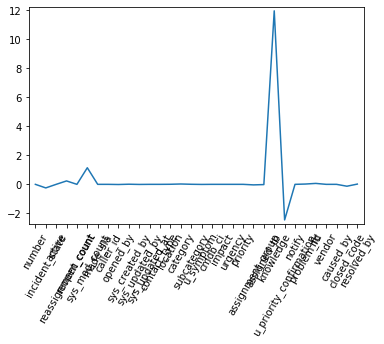

In [79]:
Xbis = df.drop('duration',axis=1)
plt.plot(range(len(Xbis.columns)), lasso_coef)
plt.xticks(range(len(Xbis.columns)), Xbis.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [80]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

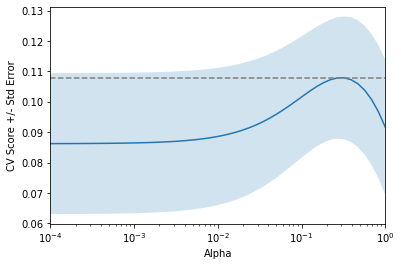

In [81]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:

    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=5)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)

In [82]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)

print(ridge_cv)

[-0.02407799  0.13935897  0.15647202  0.14304219  0.11204424]


In [84]:
def score_regression(algo, X_test, y_test):
    predictions = algo.predict(X_test)
    errors = abs(predictions - y_test)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'jours.')
    y_test = [1 if value == 0 else value for value in y_test ]
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [85]:
from sklearn.tree import DecisionTreeRegressor
treed = DecisionTreeRegressor()
treed.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [87]:
score_regression(treed, X_test,y_test)

Mean Absolute Error: 4.23 jours.
Accuracy: -388.56 %.


In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

mlp = make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=(40,30), max_iter=600, random_state=0))
mlp.fit(X_train, y_train)

C:\Users\Joakim\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(40, 30),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=600,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=0, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [89]:
score_regression(mlp, X_test,y_test)

Mean Absolute Error: 9.8 jours.
Accuracy: -1004.57 %.


In [90]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,criterion='mse')
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [92]:
y_predrf = rf.predict(X_test)

In [93]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.413690589266457
Mean Squared Error: 291.3692903200152
Root Mean Squared Error: 17.069542768334927


#  HYPERPARAMETRES avec ElasticNet et RFR (w/ gridsearch)

In [94]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [95]:
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\Joakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9498340.94266737, tolerance: 2349.249087122395
  positive)
C:\Users\Joakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9462065.190200401, tolerance: 2340.736735668584
  positive)
C:\Users\Joakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9398284.109502323, tolerance: 2326.091932975027
  positive)
C:\Users\Joakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.2022347741163354
Tuned ElasticNet MSE: 311.76805509830837


In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
rf_random.best_params_